<a href="https://colab.research.google.com/github/PrinceRaj1161/KrishUdemyLearning/blob/main/MiniProject/WeightPredictionWithSimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Getting Dataset

In [ ]:
df = pd.read_csv('/content/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


# Data Visualization

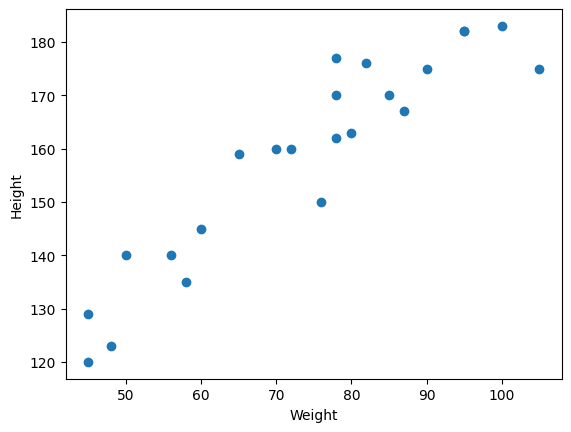

In [ ]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [ ]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


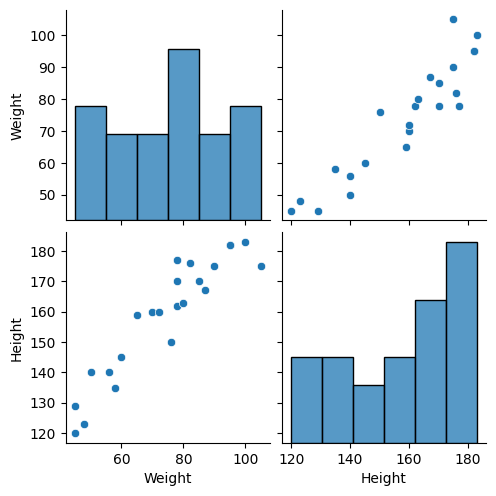

In [ ]:
# Seaborn
import seaborn as sns

sns.pairplot(df)

# Division of Feature

In [ ]:
# Dependent Variables
X = df[['Weight']]

#Independent Variables
Y = df['Height']

X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [ ]:
# Training and Test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((17, 1), (6, 1), (17,), (6,))

# Normalization and Standardization

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.05328894],
       [-1.07910112],
       [ 1.0158205 ],
       [ 1.0158205 ],
       [ 1.58201554],
       [ 0.73272299],
       [-0.05995006],
       [ 1.29891802],
       [-0.28642808],
       [ 0.05328894],
       [-1.81515467],
       [-0.96586212],
       [ 0.56286447],
       [ 0.27976696],
       [-1.64529616],
       [-1.19234013],
       [ 0.44962547]])

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[-1.53205715],
       [ 0.16652795],
       [-1.81515467],
       [-0.6827646 ],
       [ 0.05328894],
       [-0.39966708]])

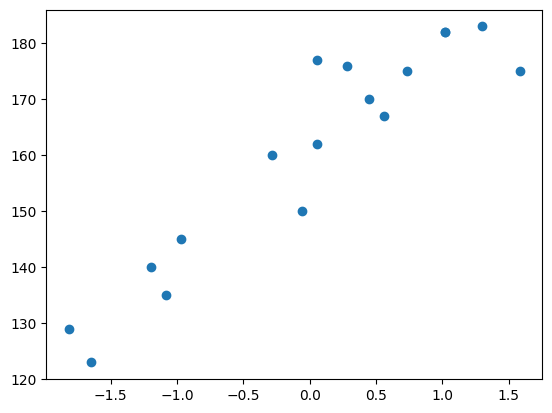

In [ ]:
# Drawing of X_train, Y_train

plt.scatter(X_train, Y_train)

# Training Model

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

# Getting Info of Regressor

In [ ]:
# Getting Y = mx + c

# To get m
print("The slope or Coff. is: ", regressor.coef_)

# To get c
print("The Intercept is: ", regressor.intercept_)

The slope or Coff. is:  [18.01616925]
The Intercept is:  160.64705882352942


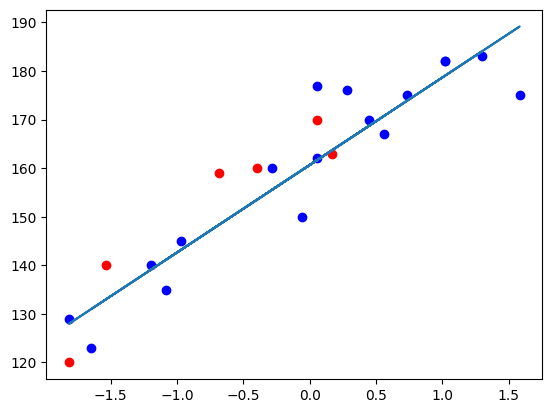

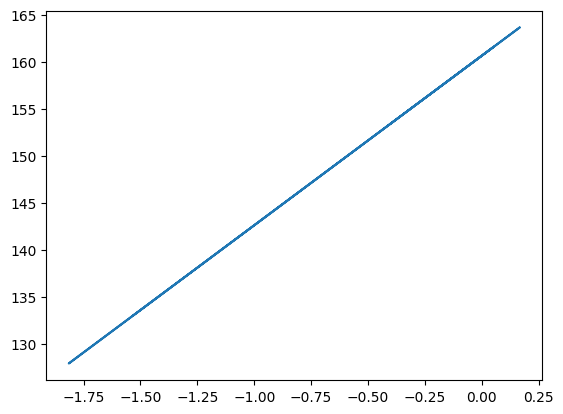

In [ ]:
# Now, Drawing the Best bit line

plt.scatter(X_train, Y_train, c='blue')
plt.scatter(X_test, Y_test, c="red")
plt.plot(X_train, regressor.predict(X_train))
plt.show()
plt.plot(X_test, regressor.predict(X_test))
plt.show()

# Evaluation

In [ ]:
# Getting the testing result

Y_pred = regressor.predict(X_test)

In [ ]:
Y_pred

array([133.0452579 , 163.64725458, 127.94492512, 148.34625624,
       161.60712146, 153.44658902])

In [ ]:
# Performance Metrices

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = root_mean_squared_error(Y_test, Y_pred)

print("MAE: ",mae)
print("MSE: ",mse)
print("RMSE: ",rmse)

MAE:  6.857825845812532
MSE:  56.466512179460494
RMSE:  7.514420282327872


R square
Formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(Y_test, Y_pred)

print(score)

0.8037085324004849


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [ ]:
X_train.shape[1]

1

In [ ]:
adjusted_r2 = 1 - ((1-score)   *    (len(Y_test)-1)    /      (len(Y_test) - X_train.shape[1] - 1))
print(adjusted_r2)

0.7546356655006061


# Using  OLS

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(Y_train, X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2009
Date:                Wed, 05 Nov 2025   Prob (F-statistic):                       0.660
Time:                        12:23:07   Log-Likelihood:                         -110.48
No. Observations:                  17   AIC:                                      223.0
Df Residuals:                      16   BIC:                                      223.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
regressor.coef_

array([18.01616925])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([-27.60180092,   3.00019575, -32.7021337 , -12.30080258,
         0.96006264,  -7.20046981])

# Predict

In [ ]:
regressor.predict(scaler.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.48672213])